In [80]:
import numpy as np
import pandas as pd
import math
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
from numpy.random import default_rng
rng = default_rng()

In [81]:
data = pd.read_csv("data/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [83]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

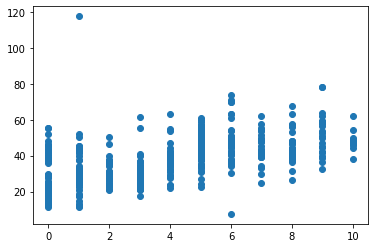

In [84]:
plt.scatter(data['X4 number of convenience stores'], data['Y house price of unit area'])

## Problem
We want a model of house prices given a bunch of other factors.
That is, we would love a function $$f(\mathbf{x}, \mathbf{w})$$ which outputs a house price given the inputs and model parameters.

Unfortunately, we are only able to measure a noisy estimate of this function:
$$ \begin{aligned}
    t &= f(\mathbf{x}, \mathbf{w}) + \epsilon \\
    \epsilon &\sim \mathcal{N}(0, \beta^{-1}) \\
    \Leftrightarrow t &\sim \mathcal{N}(f(\mathbf{x}, \mathbf{w}), \beta^{-1}) \\
\end{aligned} $$

We want to make informed/interesting observations about the relationship between house prices and inputs given the observed dataset: $$ p(t | \mathbf{x}, \mathcal{D}) $$

## Model
Let's **assume** that the function $y$ is of the form:
$$ y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=0}^{M-1} w_j \phi_j(\mathbf{x}) $$
$M$ is the number of model parameters
What this is saying is that:
We're assuming that our targets are a linear function of the parameters ${w_j}$
$$y(\mathbf{x}, \mathbf{w}) = w_0 f_0(\mathbf{x}) + w_1 f_1(\mathbf{x})+ w_2 f_2(\mathbf{x})+ \cdots + w_{M-1}  f_{M-1}(\mathbf{x}) $$

*What are the weird $\phi$ functions?*  
These are basis functions, they do not need to be linear in $\mathbf{x}$.

*What about $f_0 (\mathbf{x})$?*  
We define $\phi_0(\mathbf{x}) = 1$  
*Why?*  
So that we can write our model as:
$$ y(\mathbf{x}, \mathbf{w}) = \mathbf{w}^\top \mathbf{\phi}(\mathbf{x}) $$
Where we define 
$$ \mathbf{\phi}(\mathbf{x}) = \begin{bmatrix} \phi_0 (x_0) \\ \phi_1 (x_1) \\ \vdots \\ \phi_{M-1} (x_{M-1}) \end{bmatrix} $$

### Using our model
So, we have designed a function $y(\mathbf{x}, \mathbf{w})$.  
We should note that unless we got extremely lucky, $y(\mathbf{x}, \mathbf{w}) \ne f(\mathbf{x}, \mathbf{w})$ exactly, so our selection of model will introduce some error (unfortunately).  
That being said, we can still *try*:
$$
\begin{aligned}
    p(t| \mathbf{x}, \mathbf{w}) &= \mathcal{N}(f(\mathbf{x}, \mathbf{w}), \beta^{-1}) \\
    &\approx \mathcal{N}(y(\mathbf{x}, \mathbf{w}), \beta^{-1}) \\
    &= \mathcal{N}(\mathbf{w}^\top \mathbf{\phi}(\mathbf{x}), \beta^{-1})
\end{aligned}
$$


Remember, at the end of the day we **want** $p(t | \mathbf{x}, \mathcal{D})$ and we **have**: $p(t|\mathbf{x} , \mathbf{w})$  (or at least a model for it). Let's perform some manipulations to represent what we **want in terms of what we have** (+ other stuff)
$$ 
\begin{aligned}
    p(t | \mathbf{x} , \mathcal{D}) &= \int p(t, \mathbf{w} | \mathbf{w}, \mathcal{D}) d\mathbf{w} \\
    &= \int p(t | \mathbf{x}, \mathbf{w}) p(\mathbf{w} | \mathcal{D}) d \mathbf{w} 
\end{aligned}
$$

The first term in the integral is our model.
The second term in the integral is a way to weight our model outputs by the probability of the model parameters in the first place.


Applying Bayes Theorem:
$$
p(\mathbf{w} | \mathcal{D}) \propto p(\mathbf{w}) p(\mathcal{D} | \mathbf{w})
$$


Notice: we can calculate $p(\mathcal{D} | \mathbf{w})$ by just running our model on the dataset we collected.

In [94]:
class BayesianLinearRegression:
    def __init__(self, mean_prior, covariance_prior, noise_precision):
        # prior on w
        # prior on the model parameters
        # there are len(mean_prior) model parameters
        self.prior = multivariate_normal(mean=mean_prior, cov=covariance_prior)
        
        self.likelihood = self.
        
    def unnormalised_posterior(self)

SyntaxError: invalid syntax (<ipython-input-94-12005a9f1fc8>, line 8)

In [90]:
multivariate_normal(mean=4, cov=1).pdf([1,2,3,4,4,5,44343234])

array([0.00443185, 0.05399097, 0.24197072, 0.39894228, 0.39894228,
       0.24197072, 0.        ])